In [12]:
import os
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
%matplotlib notebook
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Set current directory and work relative to it
os.chdir('E:/gitlab/project_on_python/deep time series forcasting/Practical-Time-Series-Analysis-master')

In [4]:
djia_df = pd.read_excel('datasets/DJIA_Jan2016_Dec2016.xlsx')

In [5]:
djia_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
5,2016-01-11,16358.709961,16461.849609,16232.030273,16398.570313,16398.570313,127790000
6,2016-01-12,16419.109375,16591.349609,16322.070313,16516.220703,16516.220703,117480000
7,2016-01-13,16526.630859,16593.509766,16123.200195,16151.410156,16151.410156,153530000
8,2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000
9,2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078,15988.080078,239210000


In [6]:
#Let us parse the Date column and use as row index for the DataFrame and drop it as a column
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)

In [7]:
#Let us see first few rows of the modified DataFrame
djia_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
2016-01-11,16358.709961,16461.849609,16232.030273,16398.570313,16398.570313,127790000
2016-01-12,16419.109375,16591.349609,16322.070313,16516.220703,16516.220703,117480000
2016-01-13,16526.630859,16593.509766,16123.200195,16151.410156,16151.410156,153530000
2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000


In [8]:
#We would be using the 'Close' values of the DJIA to illustrate Differencing
first_order_diff = djia_df['Close'].diff(1)

<IPython.core.display.Javascript object>


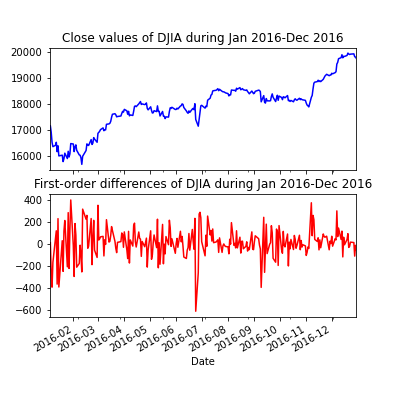

In [13]:
#Let us plot the original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')
#plt.savefig('plots/ch2/B07887_02_06.png', format='png', dpi=300)
plt.show()

A quick way to verify whether the first-order differencing has stationarized a time series is to plot the ACF function and run the Ljung-Box test for the differenced series. The LjungBox test determines if the observed auto-correlation is statistically significant. The null hypothesis of the Ljung-Box test is that the time series consist of random variations and lacks
predictable autocorrelation while the alternate hypothesis proposes that the observed autocorrelation is not random.

ACF is computed for different lags and verified by the Ljung-Box test. 

the following figure shows ACF of the DJIA close values and as well as for the time series of first-order differences. Notice that for the differenced series, ACF shows no predictable pattern and drops suddenly close to zero. Moreover, the p-value of the test being 0.894 for lag=10 makes us accept the null hypothesis of Ljung-Box test for the differenced series

<IPython.core.display.Javascript object>


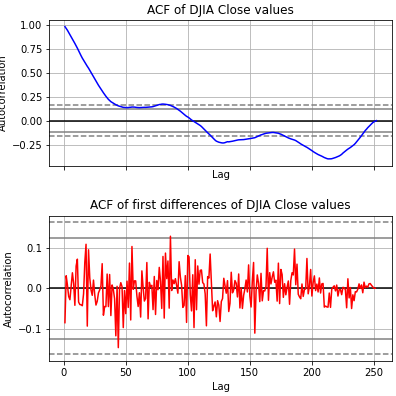

In [15]:
#Let us plot the ACFs of original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(djia_df['Close'], color='b', ax=ax[0])
ax[0].set_title('ACF of DJIA Close values')
test = autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of DJIA Close values')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
# plt.savefig('plots/ch2/B07887_02_07.png', format='png', dpi=300)
plt.show()

In [19]:
"""
Now we will perform the Ljung-Box test on the ACFs
of the original time series and the first-differences.
For running the test we will limit upto 20 lags
"""

'\nNow we will perform the Ljung-Box test on the ACFs\nof the original time series and the first-differences.\nFor running the test we will limit upto 20 lags\n'

In [20]:
"""
Let us obtain the confidence intervls, Ljung-Box Q-statistics and p-values
for the original DJIA Close values
"""
acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(djia_df['Close'],
                                                                 unbiased=True,
                                                                 nlags=20,
                                                                 qstat=True,
                                                                 alpha=0.05)

In [21]:
"""Let us check if at confidence level 95% (alpha=0.05)
if the null hypothesis is rejected at any of the lags
"""
alpha = 0.05
for l, p_val in enumerate(pvalues_djia):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 1.0693767753675923e-55
Null hypothesis is rejected at lag = 1 for p-val = 9.994326469626719e-107
Null hypothesis is rejected at lag = 2 for p-val = 3.514318635466178e-156
Null hypothesis is rejected at lag = 3 for p-val = 8.306783142362536e-204
Null hypothesis is rejected at lag = 4 for p-val = 1.3385232646526703e-249
Null hypothesis is rejected at lag = 5 for p-val = 1.1920943365339414e-293
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.

In [22]:
"""
The above results show statistically significant ACF in the original DJIA Close values
"""

'\nThe above results show statistically significant ACF in the original DJIA Close values\n'

In [26]:
"""
Let us obtain the confidence intervls, Ljung-Box Q-statistics and p-values
for the differenced DJIA Close values
"""
acf_first_diff, confint_first_diff,qstat_first_diff, pvalues_first_diff = stattools.acf(first_order_diff.iloc[1:],
                                                     unbiased=True,
                                                     nlags=20,
                                                     qstat=True,
                                                     alpha=0.05)

In [24]:
"""Let us check if at confidence level of 95% (alpha = 0.05)
if the null hypothesis is rejected at any of the lags
"""
alpha = 0.05
for l, p_val in enumerate(pvalues_first_diff):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is accepted at lag = 0 for p-val = 0.17569800898040225
Null hypothesis is accepted at lag = 1 for p-val = 0.3538300853009234
Null hypothesis is accepted at lag = 2 for p-val = 0.5531395640331849
Null hypothesis is accepted at lag = 3 for p-val = 0.6985127807558775
Null hypothesis is accepted at lag = 4 for p-val = 0.7891580120671382
Null hypothesis is accepted at lag = 5 for p-val = 0.8772903282781711
Null hypothesis is accepted at lag = 6 for p-val = 0.901277483583282
Null hypothesis is accepted at lag = 7 for p-val = 0.9429823162379645
Null hypothesis is accepted at lag = 8 for p-val = 0.9485916556521746
Null hypothesis is accepted at lag = 9 for p-val = 0.9377977943700336
Null hypothesis is accepted at lag = 10 for p-val = 0.8937612607433124
Null hypothesis is accepted at lag = 11 for p-val = 0.9152190930215198
Null hypothesis is accepted at lag = 12 for p-val = 0.9263245243892939
Null hypothesis is accepted at lag = 13 for p-val = 0.9350725554001179
Null hypothesis 

In [16]:
"""
The above results show that ACF is essentially random in the differenced DJIA Close values
"""

'\nThe above results show that ACF is essentially random in the differenced DJIA Close values\n'